In [109]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,recall_score,precision_score
import matplotlib.pyplot as plt
import scipy.stats as stats

In [95]:
my_data = pd.read_csv("Train.csv", delimiter=",")
my_data[0:5]

,SOC-1,SOC-2,SOC-3,SOC-4,SOC-5,SOC-6,SOC-7,SOR-1,SOR-2,SOR-3,SOR-4,SOR-5,SOR-6,SOR-7,SOR-8,SOR-9,Label
0,9,36,45,36,36,36,9,18,9,9,18,18,45,18,18,54,A
1,0,36,27,36,27,36,0,9,9,9,18,18,18,45,18,18,A
2,27,27,27,27,27,27,27,9,9,18,18,18,45,18,18,36,A
3,18,81,27,27,27,27,54,54,18,18,18,45,18,18,18,54,B
4,81,27,27,27,27,27,54,54,18,18,18,54,18,18,18,54,B


In [96]:
cols = list (my_data.columns)
cols.remove("Label")
for col in cols:
    my_data[col]=stats.zscore(my_data[col])
my_data.head()

,SOC-1,SOC-2,SOC-3,SOC-4,SOC-5,SOC-6,SOC-7,SOR-1,SOR-2,SOR-3,SOR-4,SOR-5,SOR-6,SOR-7,SOR-8,SOR-9,Label
0,-0.679948,-0.351048,2.587097,1.496264,1.788854,0.307784,-0.970703,-1.176038,-1.305582,-1.274755,0.098058,-0.172929,2.791989,0.117444,0.223607,0.869652,A
1,-0.997257,-0.351048,0.497519,1.496264,0.614919,0.307784,-1.467893,-1.680054,-1.305582,-1.274755,0.098058,-0.172929,0.085907,3.816931,0.223607,-1.649340,A
2,-0.045330,-0.658216,0.497519,0.448879,0.614919,-0.189405,0.023676,-1.680054,-1.305582,0.784465,0.098058,-0.172929,2.791989,0.117444,0.223607,-0.389844,A
3,-0.362639,1.184788,0.497519,0.448879,0.614919,-0.189405,1.515244,0.840027,0.522233,0.784465,0.098058,2.005972,0.085907,0.117444,0.223607,0.869652,B
4,1.858523,-0.658216,0.497519,0.448879,0.614919,-0.189405,1.515244,0.840027,0.522233,0.784465,0.098058,2.732272,0.085907,0.117444,0.223607,0.869652,B


In [97]:
columns=  [f"SOC-{x}" for x in range(1,8)] + [ f"SOR-{x}" for x in range(1,10)]
X_train = my_data[columns].values
X_train[0:5]

array([[-0.67994762, -0.35104831,  2.58709669,  1.496264  ,  1.78885438,
         0.30778392, -0.97070313, -1.17603763, -1.30558242, -1.27475488,
         0.09805807, -0.17292862,  2.79198907,  0.11744404,  0.2236068 ,
         0.86965221],
       [-0.99725651, -0.35104831,  0.4975186 ,  1.496264  ,  0.61491869,
         0.30778392, -1.46789254, -1.68005376, -1.30558242, -1.27475488,
         0.09805807, -0.17292862,  0.08590736,  3.81693143,  0.2236068 ,
        -1.6493404 ],
       [-0.04532984, -0.65821558,  0.4975186 ,  0.4488792 ,  0.61491869,
        -0.18940549,  0.02367569, -1.68005376, -1.30558242,  0.78446454,
         0.09805807, -0.17292862,  2.79198907,  0.11744404,  0.2236068 ,
        -0.38984409],
       [-0.36263873,  1.18478805,  0.4975186 ,  0.4488792 ,  0.61491869,
        -0.18940549,  1.51524392,  0.84002688,  0.52223297,  0.78446454,
         0.09805807,  2.00597195,  0.08590736,  0.11744404,  0.2236068 ,
         0.86965221],
       [ 1.8585235 , -0.65821558,  0

In [98]:
y_train = my_data['Label']
y_train [0:5]

0    A
1    A
2    A
3    B
4    B
Name: Label, dtype: object

In [99]:
cell_df_test = pd.read_csv("Test.csv")
cell_df_test.head()

,SOC-1,SOC-2,SOC-3,SOC-4,SOC-5,SOC-6,SOC-7,SOR-1,SOR-2,SOR-3,SOR-4,SOR-5,SOR-6,SOR-7,SOR-8,SOR-9,Label
0,9,31,51,42,36,37,9,18,15,9,24,18,45,24,18,44,A
1,12,26,27,31,23,26,6,9,4,9,18,13,18,40,14,26,A
2,27,22,33,28,27,22,27,9,9,18,18,18,30,18,18,48,A
3,18,76,39,33,27,27,54,54,13,18,24,45,24,24,18,54,B
4,71,27,27,28,27,27,49,54,18,13,18,44,18,18,19,54,B


In [100]:
cols = list (cell_df_test.columns)
cols.remove("Label")
for col in cols:
    cell_df_test[col]=stats.zscore(cell_df_test[col])
cell_df_test.head()

,SOC-1,SOC-2,SOC-3,SOC-4,SOC-5,SOC-6,SOC-7,SOR-1,SOR-2,SOR-3,SOR-4,SOR-5,SOR-6,SOR-7,SOR-8,SOR-9,Label
0,-0.830653,-0.454065,2.348656,1.949170,1.874530,0.530602,-1.025418,-1.063694,-0.266285,-1.316269,0.714421,-0.227102,3.176397,0.988483,-0.144164,0.295093,A
1,-0.696470,-0.625565,0.184629,0.742043,0.000000,-0.139174,-1.208424,-1.575241,-2.023765,-1.316269,0.016614,-0.660661,0.194581,3.294944,-1.245052,-1.017202,A
2,-0.025559,-0.762764,0.725636,0.412827,0.576778,-0.382729,0.072622,-1.575241,-1.224910,0.885278,0.016614,-0.227102,1.519832,0.123560,-0.144164,0.586714,A
3,-0.428106,1.089430,1.266643,0.961521,0.576778,-0.078286,1.719681,0.982496,-0.585827,0.885278,0.714421,2.114115,0.857206,0.988483,-0.144164,1.024145,B
4,1.942449,-0.591265,0.184629,0.412827,0.576778,-0.078286,1.414670,0.982496,0.213028,-0.337804,0.016614,2.027403,0.194581,0.123560,0.131058,1.024145,B


In [101]:
X_test =cell_df_test[columns].values
X_test[0:5]

array([[-0.83065256, -0.45406534,  2.34865636,  1.94916975,  1.87452964,
         0.53060198, -1.02541784, -1.06369393, -0.26628484, -1.31626914,
         0.71442109, -0.22710217,  3.17639672,  0.9884833 , -0.14416392,
         0.29509264],
       [-0.69647022, -0.62556484,  0.18462929,  0.74204317,  0.        ,
        -0.13917429, -1.20842443, -1.57524139, -2.02376481, -1.31626914,
         0.01661444, -0.66066085,  0.19458059,  3.29494434, -1.24505204,
        -1.0172017 ],
       [-0.02555854, -0.76276444,  0.72563606,  0.41282684,  0.57677835,
        -0.3827293 ,  0.07262166, -1.57524139, -1.22491028,  0.88527836,
         0.01661444, -0.22710217,  1.5198322 ,  0.12356041, -0.14416392,
         0.58671361],
       [-0.42810555,  1.08943016,  1.26664283,  0.96152073,  0.57677835,
        -0.07828554,  1.71968092,  0.98249592, -0.58582665,  0.88527836,
         0.71442109,  2.11411471,  0.8572064 ,  0.9884833 , -0.14416392,
         1.02414505],
       [ 1.94244905, -0.59126494,  0

In [102]:
y_test =my_data['Label']
y_test [0:5]

0    A
1    A
2    A
3    B
4    B
Name: Label, dtype: object

In [123]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 27)
Tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=27)

In [124]:
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=27)

In [125]:
predTree = Tree.predict(X_test)

In [126]:
print (predTree )
print (y_test )

['K' 'A' 'A' 'B' 'B' 'B' 'C' 'C' 'C' 'E' 'D' 'D' 'D' 'E' 'E' 'J' 'J' 'C'
 'K' 'K' 'K']
0     A
1     A
2     A
3     B
4     B
5     B
6     C
7     C
8     C
9     D
10    D
11    D
12    E
13    E
14    E
15    J
16    J
17    J
18    K
19    K
20    K
Name: Label, dtype: object


In [127]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8095238095238095


In [128]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

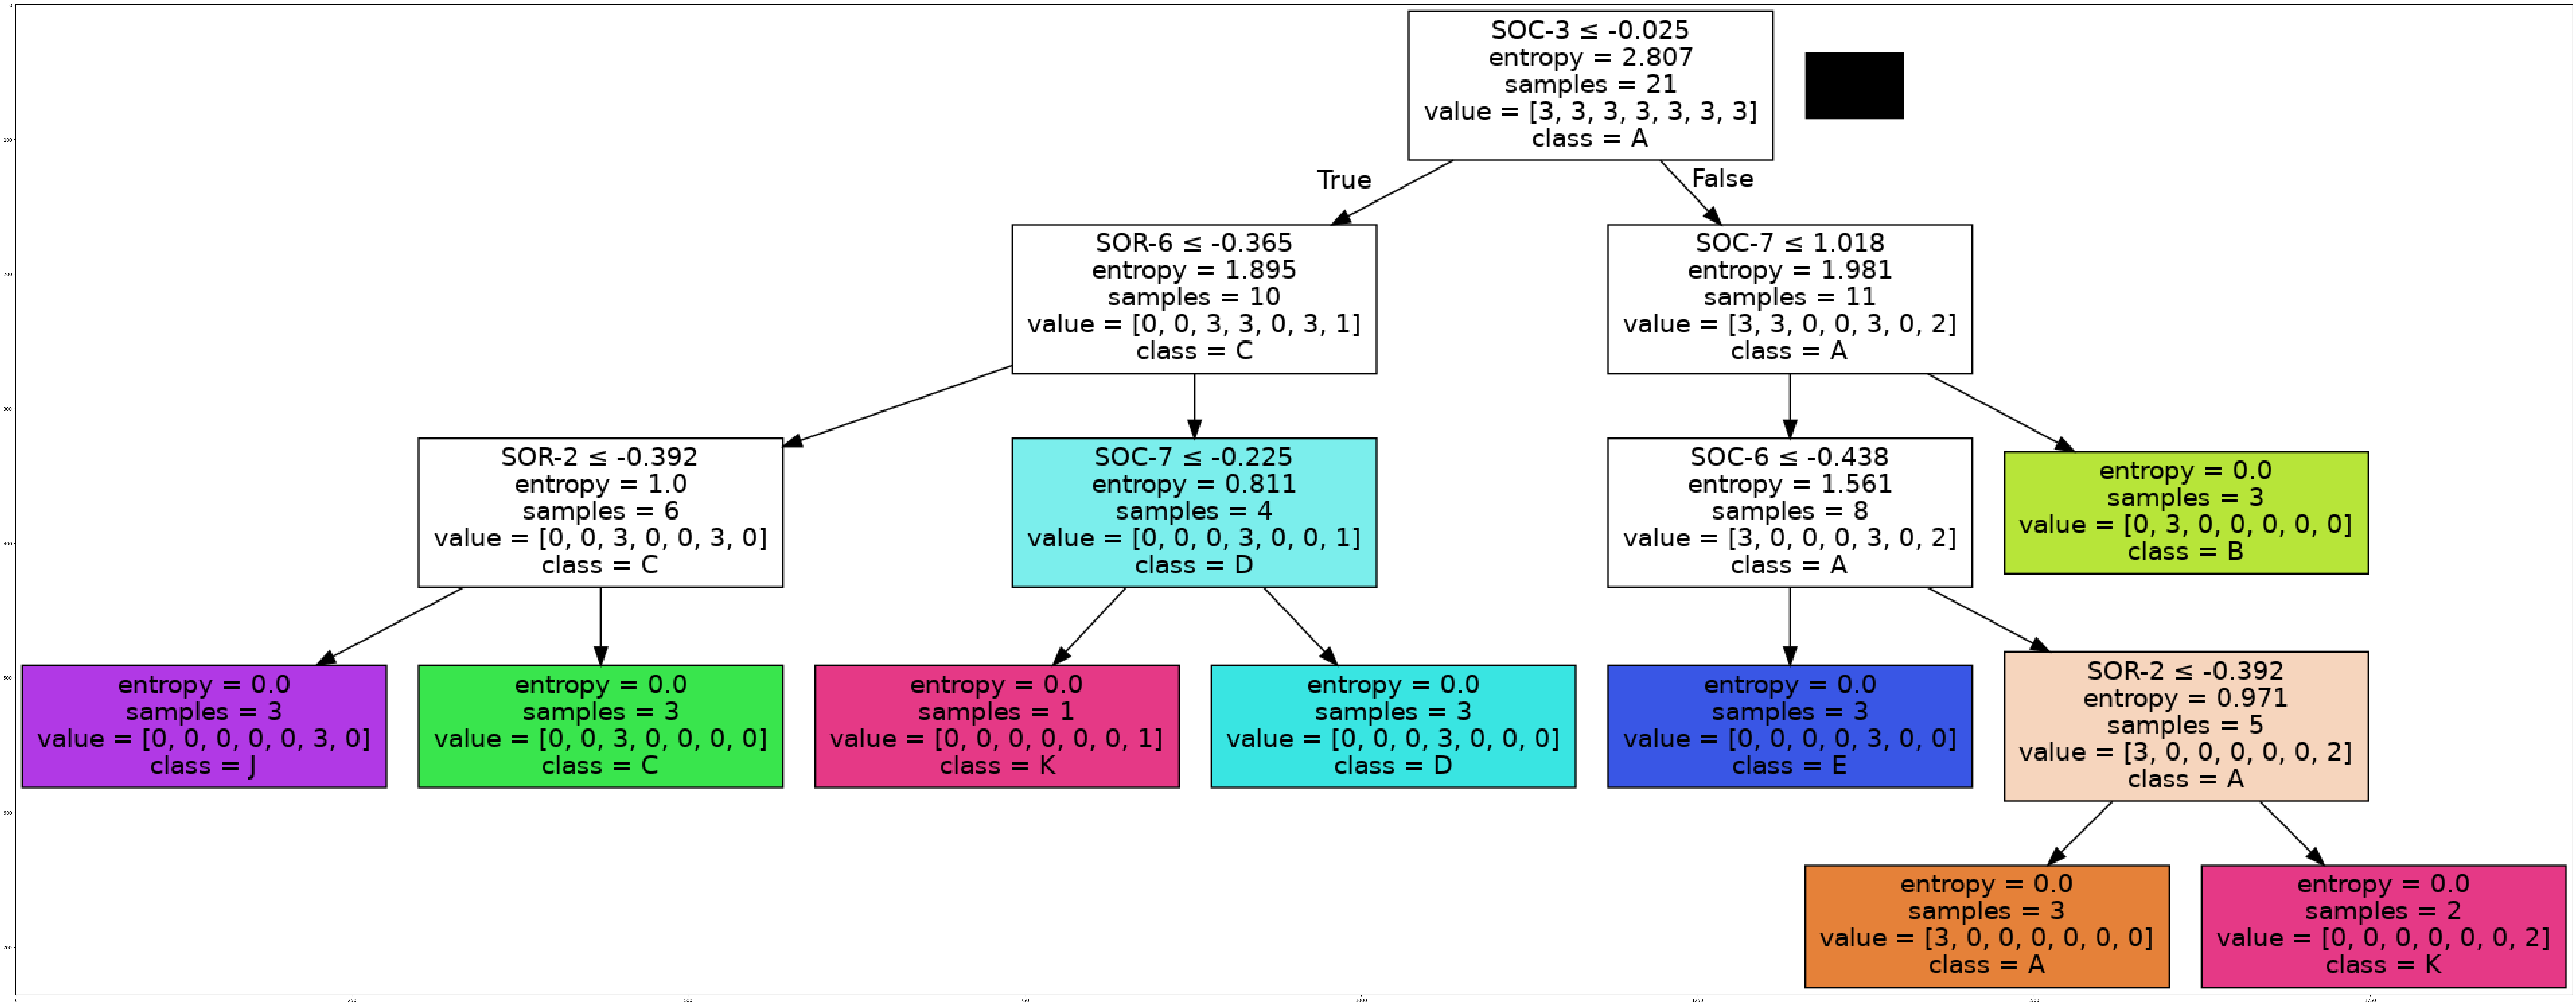

In [129]:
dot_data = StringIO()
filename = "tree.png"
featureNames = my_data.columns[0:16]
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [131]:
recall = recall_score(y_test, predTree, average='weighted')
print(f'Recall: {recall}')

Recall: 0.8095238095238095


In [132]:
f1=f1_score(y_test, predTree, average='weighted')
print(f'F-Measure: {f1}')

F-Measure: 0.8068027210884354


In [133]:
precision = precision_score(y_test, predTree, average='weighted')
print(f'Precision: {precision}')

Precision: 0.8333333333333334
